In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Instralación
%pip install tensorflow numpy scikit-learn seaborn matplotlib folium requests pandas geopandas rasterio mapclassify imblearn python-aqi --quiet

# Librerías básicas
import os
import json
from io import StringIO
from itertools import combinations
import requests

# Librerías de manejo de datos
import pandas as pd
###############################################################################
###################   GP: added packages            ###########################
###############################################################################
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
###############################################################################
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de aprendizaje automático
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn.preprocessing import *
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix
from scipy.stats import pearsonr

# Librerías de balanceo de datos
from imblearn.over_sampling import SMOTE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
dataframe_completo_original = pd.read_excel('/content/drive/MyDrive/df_completo.xlsx')
dataframe_completo_original

,Fecha,id_estacion,Estación,mediciones,type,geometry.type,coordenadas,dir_estacion,municipio,comunidad,id_municipio,id_comunidad,properties._links.self.href,Zona_geografica
0,2023-01-01,83,ELCIEGO,"{'NO': 1.0, 'NO2': 2.0, 'NOX': 4.0, 'O3': 58.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
1,2023-01-02,83,ELCIEGO,"{'NO': 1.0, 'NO2': 5.0, 'NOX': 7.0, 'O3': 51.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
2,2023-01-03,83,ELCIEGO,"{'NO': 1.0, 'NO2': 6.0, 'NOX': 8.0, 'O3': 49.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
3,2023-01-04,83,ELCIEGO,"{'NO': 1.0, 'NO2': 8.0, 'NOX': 9.0, 'O3': 41.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
4,2023-01-05,83,ELCIEGO,"{'NO': 1.0, 'NO2': 9.0, 'NOX': 10.0, 'O3': 35....",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19851,2023-12-27,91,ZIERBENA (Puerto),"{'CO': 0.15, 'CO 8h': 0.18, 'NO': 1.0, 'NO2': ...",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial
19852,2023-12-28,91,ZIERBENA (Puerto),"{'CO': 0.2, 'CO 8h': 0.2, 'NO': 1.0, 'NO2': 2....",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial
19853,2023-12-29,91,ZIERBENA (Puerto),"{'CO': 0.0, 'CO 8h': 0.0, 'NO': 1.0, 'NO2': 3....",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial
19854,2023-12-30,91,ZIERBENA (Puerto),"{'CO': 0.18, 'CO 8h': 0.19, 'NO': 1.0, 'NO2': ...",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial


In [ ]:
dataframe_completo_original.Zona_geografica.value_counts()

Zona_geografica
Urbano        13015
Rural          3960
Industrial     2881
Name: count, dtype: int64

In [ ]:
dataframe_completo_original['mediciones'] = dataframe_completo_original['mediciones'].apply(eval)
# Crear el nuevo DataFrame limitando las mediciones
df_limitado = dataframe_completo_original.copy()

# Definir las mediciones a eliminar
mediciones_a_eliminar = ['CO', 'CO 8h', 'Benceno', 'Tolueno', 'Etilbenceno', 'Ortoxileno', 'SH2', 'M-P-XILENO', 'NH3']

# Función para eliminar las mediciones no deseadas de cada diccionario
def filtrar_mediciones(diccionario):
    return {k: v for k, v in diccionario.items() if k not in mediciones_a_eliminar}

# Aplicar la función a la columna "mediciones" en df_limitado
df_limitado['mediciones'] = df_limitado['mediciones'].apply(filtrar_mediciones)

# Mostrar el nuevo DataFrame
df_limitado

,Fecha,id_estacion,Estación,mediciones,type,geometry.type,coordenadas,dir_estacion,municipio,comunidad,id_municipio,id_comunidad,properties._links.self.href,Zona_geografica
0,2023-01-01,83,ELCIEGO,"{'NO': 1.0, 'NO2': 2.0, 'NOX': 4.0, 'O3': 58.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
1,2023-01-02,83,ELCIEGO,"{'NO': 1.0, 'NO2': 5.0, 'NOX': 7.0, 'O3': 51.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
2,2023-01-03,83,ELCIEGO,"{'NO': 1.0, 'NO2': 6.0, 'NOX': 8.0, 'O3': 49.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
3,2023-01-04,83,ELCIEGO,"{'NO': 1.0, 'NO2': 8.0, 'NOX': 9.0, 'O3': 41.0...",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
4,2023-01-05,83,ELCIEGO,"{'NO': 1.0, 'NO2': 9.0, 'NOX': 10.0, 'O3': 35....",Feature,Point,"[-2.61947521199466, 42.51824807424149]","C/ Gabriel Celaya, 8",Elciego,Araba/Álava,22,1,https://api.euskadi.eus/air-quality/stations/83,Industrial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19851,2023-12-27,91,ZIERBENA (Puerto),"{'NO': 1.0, 'NO2': 2.0, 'NOX': 3.0, 'PM10': 5.0}",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial
19852,2023-12-28,91,ZIERBENA (Puerto),"{'NO': 1.0, 'NO2': 2.0, 'NOX': 3.0, 'PM10': 4.0}",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial
19853,2023-12-29,91,ZIERBENA (Puerto),"{'NO': 1.0, 'NO2': 3.0, 'NOX': 5.0, 'PM10': 10.0}",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial
19854,2023-12-30,91,ZIERBENA (Puerto),"{'NO': 1.0, 'NO2': 4.0, 'NOX': 6.0, 'PM10': 5.0}",Feature,Point,"[-3.080988277376953, 43.35305543364201]","Puerto de Zierbena, s/n. Bº El Puerto",Zierbena,Bizkaia,913,48,https://api.euskadi.eus/air-quality/stations/91,Industrial


In [ ]:
df_analisis = pd.read_excel("/content/drive/MyDrive/df_sinNaN.xlsx")

In [ ]:
df_analisis

,Estacion,NO,NO2,NOX,O3,O3 8h,PM10,"PM2,5",SO2
0,ELCIEGO,1,2,4,58,56,13,0,0
1,ELCIEGO,1,5,7,51,52,10,0,0
2,ELCIEGO,1,6,8,49,49,5,0,0
3,ELCIEGO,1,8,9,41,44,6,0,0
4,ELCIEGO,1,9,10,35,34,6,0,0
...,...,...,...,...,...,...,...,...,...
19851,ZIERBENA (Puerto),1,2,3,0,0,5,0,0
19852,ZIERBENA (Puerto),1,2,3,0,0,4,0,0
19853,ZIERBENA (Puerto),1,3,5,0,0,10,0,0
19854,ZIERBENA (Puerto),1,4,6,0,0,5,0,0


In [ ]:
df_analisis['Zona_geografica'] = dataframe_completo_original['Zona_geografica']
df_analisis
# # mappings = {'Rural': 1, 'Industrial': 2, 'Urbano': 3}
# mappings = {'Rural': 0, 'Industrial': 1, 'Urbano': 2}
# df_vm_sinNaN['Zona_geografica'] = df_vm_sinNaN['Zona_geografica'].map(mappings)

# # Creo un nuevo dataframe para el analisis de los datos
# df_analisis = df_vm_sinNaN
# df_analisis

,Estacion,NO,NO2,NOX,O3,O3 8h,PM10,"PM2,5",SO2,Zona_geografica
0,ELCIEGO,1,2,4,58,56,13,0,0,Industrial
1,ELCIEGO,1,5,7,51,52,10,0,0,Industrial
2,ELCIEGO,1,6,8,49,49,5,0,0,Industrial
3,ELCIEGO,1,8,9,41,44,6,0,0,Industrial
4,ELCIEGO,1,9,10,35,34,6,0,0,Industrial
...,...,...,...,...,...,...,...,...,...,...
19851,ZIERBENA (Puerto),1,2,3,0,0,5,0,0,Industrial
19852,ZIERBENA (Puerto),1,2,3,0,0,4,0,0,Industrial
19853,ZIERBENA (Puerto),1,3,5,0,0,10,0,0,Industrial
19854,ZIERBENA (Puerto),1,4,6,0,0,5,0,0,Industrial


In [ ]:
print(f"Distribución de las zonas antes de balancear los datos: {df_analisis.Zona_geografica.value_counts()}")

# Seleccionamos 3000 filas aleatorias de la clase Urbana (2)
urbano_sample = df_analisis[df_analisis["Zona_geografica"] == 'Urbano'].sample(n=3000, random_state=1)

# Combinamos las filas de las tres clases para el nuevo dataframe balanceado
df_analisis_balanced = pd.concat([
    df_analisis[df_analisis["Zona_geografica"] == 'Rural'],
    df_analisis[df_analisis["Zona_geografica"] == 'Industrial'],
    urbano_sample
])

# Mezclamos el dataframe para mayor aleatoriedad
df_analisis_balanced = df_analisis_balanced.sample(frac=1, random_state=1).reset_index(drop=True)

df_analisis_balanced
print(f"Distribución después de las zonas despues de balancear los datos: {df_analisis_balanced.Zona_geografica.value_counts()}")

Distribución de las zonas antes de balancear los datos: Zona_geografica
Urbano        13015
Rural          3960
Industrial     2881
Name: count, dtype: int64
Distribución después de las zonas despues de balancear los datos: Zona_geografica
Rural         3960
Urbano        3000
Industrial    2881
Name: count, dtype: int64


In [ ]:
columnas_a_normalizar = [	'NO',	'NO2',	'NOX',	'O3',	'O3 8h',	'PM10',	'PM2,5',	'SO2']

scaler = StandardScaler()

df_analisis_balanced[columnas_a_normalizar] = scaler.fit_transform(df_analisis_balanced[columnas_a_normalizar])

print(df_analisis_balanced.head())

            Estacion        NO       NO2       NOX        O3     O3 8h  \
0               LEZO -0.666705 -1.057185 -0.934270 -1.151884 -1.138072   
1             SESTAO -0.073232 -0.172935 -0.169853 -1.151884 -1.138072   
2           SERANTES -0.666705 -0.615060 -0.615763  0.840533  0.757173   
3  ZIERBENA (Puerto) -0.468880 -0.504529 -0.488360 -1.151884 -1.138072   
4             TOLOSA  0.718065  0.269191  0.594564 -1.151884 -1.138072   

       PM10     PM2,5       SO2 Zona_geografica  
0  3.391889 -0.698287 -0.696157          Urbano  
1 -1.034728 -0.698287 -0.696157      Industrial  
2 -1.034728 -0.698287 -0.696157           Rural  
3  0.120042 -0.698287 -0.696157      Industrial  
4  0.120042  0.837364 -0.696157          Urbano  


In [ ]:
# Dividir las estaciones en dos grupos (entrenamiento y prueba)
estaciones_entrenamiento, estaciones_prueba = train_test_split(df_analisis_balanced['Estacion'].unique(), test_size=0.2, random_state=42)

# Filtrar los datos de entrenamiento y prueba según las estaciones
df_entrenamiento = df_analisis_balanced[df_analisis_balanced['Estacion'].isin(estaciones_entrenamiento)]
df_prueba = df_analisis_balanced[df_analisis_balanced['Estacion'].isin(estaciones_prueba)]

# Dividir los datos en características (X) y etiquetas (y)
X_train_v2 = df_entrenamiento.drop(columns=['Estacion', 'Zona_geografica'])
y_train_v2 = df_entrenamiento['Zona_geografica']
X_test_v2 = df_prueba.drop(columns=['Estacion', 'Zona_geografica'])
y_test_v2 = df_prueba['Zona_geografica']

le = LabelEncoder()
y_train_v2_encoded = le.fit_transform(y_train_v2)
y_test_v2_encoded = le.fit_transform(y_test_v2)
# Verificar la codificación
print("Etiquetas codificadas para el conjunto de entrenamiento:", y_train_v2_encoded)
print("Etiquetas codificadas para el conjunto de prueba:", y_test_v2_encoded)

Etiquetas codificadas para el conjunto de entrenamiento: [2 0 1 ... 2 1 0]
Etiquetas codificadas para el conjunto de prueba: [0 0 1 ... 0 1 1]


In [ ]:
# Obtener los índices de las filas en el conjunto de entrenamiento
indices_prueba_v2 = X_train_v2.index

# Creamos un dataframe con las filas del conjunto de entrenamiento
df_train_v2 = df_analisis_balanced.loc[indices_prueba_v2]
print(f"Distribución de las zonas del conjunto de entrenamiento: {df_train_v2.Zona_geografica.value_counts()}")

Distribución de las zonas del conjunto de entrenamiento: Zona_geografica
Rural         2874
Urbano        2492
Industrial    2157
Name: count, dtype: int64


In [ ]:
# Obtener los índices de las filas en el conjunto de prueba
indices_prueba_v2 = X_test_v2.index

# Creamos un dataframe con las filas del conjunto de prueba
df_test_v2 = df_analisis_balanced.loc[indices_prueba_v2]
print(f"Distribución de las zonas del conjunto de prueba: {df_test_v2.Zona_geografica.value_counts()}")

Distribución de las zonas del conjunto de prueba: Zona_geografica
Rural         1086
Industrial     724
Urbano         508
Name: count, dtype: int64


# ALGORIRMOS USANDO EL MODELO (SIN MEJORAR).

## KNN

In [ ]:
knn_model_sin_Mejora = KNeighborsClassifier()
knn_model_sin_Mejora.fit(X_train_v2, y_train_v2_encoded)
y_pred = knn_model_sin_Mejora.predict(X_test_v2)
knn_score = accuracy_score(y_test_v2_encoded, y_pred)
print("Precisión del KNN sin mejora: ", knn_score)

Precisión del KNN sin mejora:  0.2924935289042278


## RANDOM FOREST

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_v2, y_train_v2_encoded)
y_pred_rf = random_forest_model.predict(X_test_v2)
random_forest_score = accuracy_score(y_test_v2_encoded, y_pred_rf)
print(f"Precisión del modelo Random Forest: {random_forest_score}")

Precisión del modelo Random Forest: 0.2653149266609146


## ÁRBOL DE DECISIÓN

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth = None, random_state = 42)
decision_tree_model.fit(X_train_v2, y_train_v2_encoded)
y_pred_tree = decision_tree_model.predict(X_test_v2)
decision_tree_score = accuracy_score(y_test_v2_encoded, y_pred_tree)
print(f"Precisión del modelo de Árbol de decisión: {decision_tree_score}")

Precisión del modelo de Árbol de decisión: 0.2618636755823986


## REGRESIÓN LINEAL

In [ ]:
from sklearn.linear_model import LinearRegression
# Inicializar el modelo de regresión lineal
linear_model = LinearRegression()
# Entrenar el modelo de regresión lineal
linear_model.fit(X_train_v2, y_train_v2_encoded)
# Realizar predicciones en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test_v2)
# Dado que estamos tratando de predecir categorías, convertiremos las predicciones a clases
y_pred_linear_class = [round(pred) for pred in y_pred_linear]
# Calcular la precisión del modelo de regresión lineal (clasificación)
accuracy_linear = accuracy_score(y_test_v2_encoded, y_pred_linear_class)
print("Precisión del modelo de regresión lineal (clasificación):", accuracy_linear)

Precisión del modelo de regresión lineal (clasificación): 0.4969801553062985


## BAGGING RANDOM FOREST

In [ ]:
# Creamos una instancia del clasificador RandomForest
forest = RandomForestClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator= forest, random_state = 42)
bagging_model.fit(X_train_v2, y_train_v2_encoded)
y_pred_brf = bagging_model.predict(X_test_v2)
bagging_score = accuracy_score(y_test_v2_encoded, y_pred_brf)
print(f"Precisión del modelo Bagging Random Forest: {bagging_score}")

Precisión del modelo Bagging Random Forest: 0.26056945642795515


## LONG SHORT-TERM MEMORY (LSTM)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical

# Convertir las etiquetas a categóricas (one-hot encoding)
num_classes = len(np.unique(y_train_v2_encoded))
y_train_categorical = to_categorical(y_train_v2_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_v2_encoded, num_classes=num_classes)

# Expandir las dimensiones para que sean compatibles con LSTM (timesteps=1)
X_train_expanded = np.expand_dims(X_train_v2, axis=1)
X_test_expanded = np.expand_dims(X_test_v2, axis=1)

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_expanded.shape[1], X_train_expanded.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_expanded, y_test_categorical)
print(f"Precisión del modelo LSTM: {accuracy}")

73/73 [==============================] - 1s 3ms/step - loss: 1.1827 - accuracy: 0.2110
Precisión del modelo LSTM: 0.21095772087574005


## MULTILAYERED PERCEPTRON (MLP)

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Convertir las etiquetas a categóricas (one-hot encoding)
num_classes = len(np.unique(y_train_v2_encoded))
y_train_categorical = to_categorical(y_train_v2_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_v2_encoded, num_classes=num_classes)

# Definir el modelo MLP
model = Sequential()
model.add(Dense(128, input_shape=(X_train_v2.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_v2, y_train_categorical, epochs=50, batch_size=32, validation_data=(X_test_v2, y_test_categorical))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_v2, y_test_categorical)
print(f"Precisión del modelo MLP: {accuracy}")

Epoch 1/50
236/236 [==============================] - 3s 6ms/step - loss: 1.1983 - accuracy: 0.6581 - val_loss: 1.4730 - val_accuracy: 0.3960
Epoch 2/50
236/236 [==============================] - 1s 6ms/step - loss: 0.5731 - accuracy: 0.7803 - val_loss: 1.9618 - val_accuracy: 0.3827
Epoch 3/50
236/236 [==============================] - 1s 5ms/step - loss: 0.4794 - accuracy: 0.8146 - val_loss: 2.2985 - val_accuracy: 0.3913
Epoch 4/50
236/236 [==============================] - 1s 6ms/step - loss: 0.4327 - accuracy: 0.8345 - val_loss: 2.4972 - val_accuracy: 0.3991
Epoch 5/50
236/236 [==============================] - 1s 5ms/step - loss: 0.4030 - accuracy: 0.8473 - val_loss: 2.6066 - val_accuracy: 0.3995
Epoch 6/50
236/236 [==============================] - 2s 8ms/step - loss: 0.3781 - accuracy: 0.8536 - val_loss: 2.6662 - val_accuracy: 0.3973
Epoch 7/50
236/236 [==============================] - 2s 7ms/step - loss: 0.3585 - accuracy: 0.8651 - val_loss: 2.9890 - val_accuracy: 0.3607
Epoch 

## SUPPORT VECTOR MACHINE (SVM)

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Convertir las etiquetas a categóricas (one-hot encoding)
num_classes = len(np.unique(y_train_v2_encoded))
y_train_categorical = to_categorical(y_train_v2_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_v2_encoded, num_classes=num_classes)

# Definir el modelo Deep SVM con Keras
model = Sequential()
model.add(Dense(128, input_shape=(X_train_v2.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='linear'))  # Usamos activación 'linear' para simular SVM

# Definir la función de pérdida para SVM
def svm_loss(y_true, y_pred):
    regularization_loss = tf.reduce_mean(tf.square(y_pred))  # Regularización L2
    hinge_loss = tf.reduce_mean(tf.maximum(0., 1. - y_true * y_pred))  # Pérdida hinge
    return regularization_loss + hinge_loss

# Compilar el modelo usando SGD con un learning rate bajo
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss=svm_loss, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_v2, y_train_categorical, epochs=50, batch_size=32, validation_data=(X_test_v2, y_test_categorical))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_v2, y_test_categorical)
print(f"Precisión del modelo Deep SVM: {accuracy}")

Epoch 1/50
236/236 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.2867 - val_loss: nan - val_accuracy: 0.3123
Epoch 2/50
236/236 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.2867 - val_loss: nan - val_accuracy: 0.3123
Epoch 3/50
236/236 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2867 - val_loss: nan - val_accuracy: 0.3123
Epoch 4/50
236/236 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2867 - val_loss: nan - val_accuracy: 0.3123
Epoch 5/50
236/236 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.2867 - val_loss: nan - val_accuracy: 0.3123
Epoch 6/50
236/236 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2867 - val_loss: nan - val_accuracy: 0.3123
Epoch 7/50
236/236 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.2867 - val_loss: nan - val_accuracy: 0.3123
Epoch 8/50
236/236 [============================

## TABLA

In [ ]:
import pandas as pd

# Crear un diccionario con los nombres de las columnas y los datos correspondientes
data = {
    'Algoritmo': ['KNN', 'Bagging Random Forest', 'Árboles de Decisión', 'Regresión Lineal', 'Random Forest', 'Long Short-Term Memory', 'Multilayered Perceptron', 'Support Vector Machine'],
    'Score': [knn_score, bagging_score, decision_tree_score, logistic_score, random_forest_score, lstm_accuracy, mlp_score, svm_score]
}

# Crear un DataFrame a partir del diccionario
df_comparacion = pd.DataFrame(data)

# Mostrar el DataFrame
df_comparacion

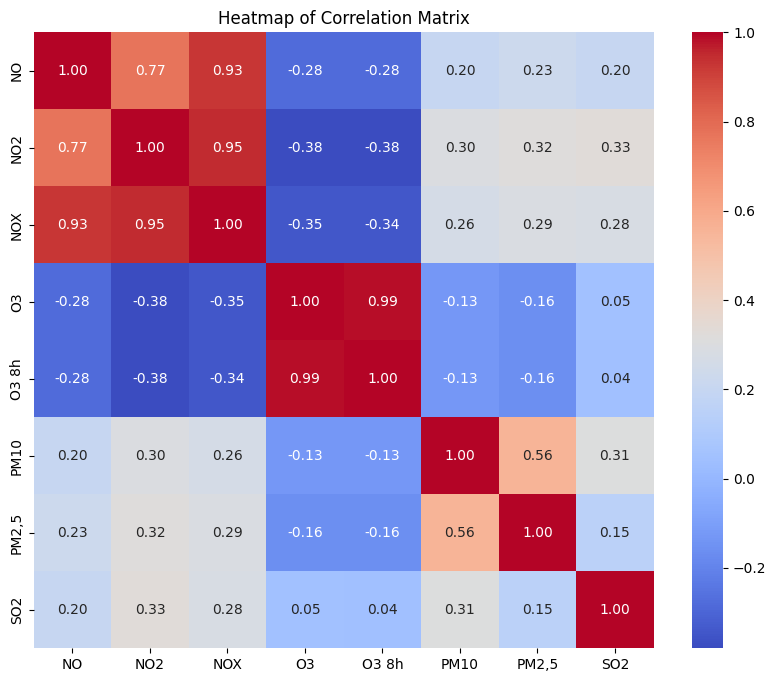

In [ ]:
# Dropping the unnecessary columns
df_selected = df_analisis_balanced.drop(columns=['Estacion', 'Zona_geografica'])

# Calculating the correlation matrix
correlation_matrix = df_selected.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# ALGORITMOS USANDO EL MODELO (CON MEJORA)

In [ ]:
# Normalizamos los datos
# scaler = StandardScaler()
# X_train_normalized = scaler.fit_transform(X_train_v2)
# X_test_normalized = scaler.transform(X_test_v2)

smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_v2, y_train_v2_encoded)

## KNN

In [ ]:
p_g = {'n_neighbors': list(range(1, 121))}
knn_m = KNeighborsClassifier()
g_s = GridSearchCV(knn_m, p_g, cv=5, scoring='accuracy')
g_s.fit(X_train_smote, y_train_smote)
print("Mejor valor de k: ", g_s.best_params_['n_neighbors'])

# Calcular la precisión del modelo KNN con los datos de prueba
knn_score_mejorado = g_s.score(X_test_v2, y_test_v2_encoded)
print("Precisión del modelo KNN con mejora:", knn_score_mejorado)

Mejor valor de k:  1
Precisión del modelo KNN con mejora: 0.2713546160483175


## RAMDOM FOREST

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_smote, y_train_smote)
y_pred_rf = random_forest_model.predict(X_test_normalized)
random_forest_score = accuracy_score(y_test_v2_encoded, y_pred_rf)
print(f"Precisión del modelo Random Forest: {random_forest_score}")

Precisión del modelo Random Forest: 0.2670405522001726


In [ ]:
# @title PROBAR ESTO
# Example of parameter grid for GridSearchCV
parameter_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2', 3],
    'max_depth' : [2,4,5,6,7,8,10],
    'criterion' :['gini', 'entropy'],
    'bootstrap': [True, False]
}
my_model = RandomForestClassifier()
clf = GridSearchCV(my_model, parameter_grid, cv = 10, scoring = 'accuracy', n_jobs = -1, verbose = 1)
clf.fit(X_train_normalized, y_train_v2)
from sklearn import metrics
print(clf.best_params_)
print(clf.best_score_)

## ÁRBOL DE DESCISIÓN

In [ ]:
from sklearn.metrics import classification_report
model_tree_M = DecisionTreeClassifier()
model_tree_M.fit(X_train_smote, y_train_smote)
y_pred_M = model_tree_M.predict(X_test_normalized)
print(f"Matriz de confusión:\n{confusion_matrix(y_test_v2_encoded, y_pred_M)}")
df_f1_M = f1_score(y_test_v2_encoded, y_pred_M, average='macro')
print(f"F1 SCORE:{df_f1_M}")
dt_accuracy_M = accuracy_score(y_test_v2_encoded, y_pred_M)
print(f"dt accuracy:{dt_accuracy_M}")
print(classification_report(y_test_v2_encoded, y_pred_M))

Matriz de confusión:
[[ 33 309 382]
 [ 20 308 758]
 [164  80 264]]
F1 SCORE:0.2305913053090729
dt accuracy:0.26100086281276963
              precision    recall  f1-score   support

           0       0.15      0.05      0.07       724
           1       0.44      0.28      0.35      1086
           2       0.19      0.52      0.28       508

    accuracy                           0.26      2318
   macro avg       0.26      0.28      0.23      2318
weighted avg       0.30      0.26      0.24      2318



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
dTree_clf = DecisionTreeClassifier()
param_dist = {"max_depth": range(3, 10, 2),
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(dTree_clf, param_dist, cv = 5)
tree_cv.fit(X_train_normalized, y_train_v2)
pred_tree_cv = tree_cv.predict(X_test_normalized)
# Evaluar el modelo
accuracy = tree_cv.score(X_test_normalized, y_test_v2)
print(f"Precisión del modelo de Regresión Logística: {accuracy}")

Precisión del modelo de Regresión Logística: 0.26100086281276963


## REGRESIÓN LOGISTICA O LINEAL

In [ ]:
# @title PROBAR ESTO
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(multi_class = 'multinomial', solver= 'saga', max_iter=10000)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
distributions = dict(C=uniform(loc =0, scale=4),
                     penalty=['l2', 'l1'],
                     solver=['saga'])
rand_lm = RandomizedSearchCV(lm, distributions, random_state=0)
rand_lm.fit(X_train_smote, y_train_smote)

pred_rand_lm = rand_lm.predict(X_test_normalized)
accuracy = rand_lm.score(X_test_normalized, y_test_v2_encoded)
print(f"Precisión del modelo: {accuracy}")
print(f"Prediction: {pred_rand_lm}")

Precisión del modelo: 0.3628127696289905
Prediction: [0 0 2 ... 0 2 2]


## BAGGING RANDOM FOREST

In [ ]:
# Creamos una instancia del clasificador RandomForest
forest_mejorado = RandomForestClassifier(n_estimators=5, random_state=42)
bagging_model_mejorado = BaggingClassifier(estimator = forest_mejorado, random_state = 42)

bagging_model_mejorado.fit(X_train_smote, y_train_smote)
bagging_score_mejorado = bagging_model_mejorado.score(X_test_normalized, y_test_v2_encoded)
print(f"Precisión del modelo Bagging Random Forest: {bagging_score_mejorado}")

## LONG SHORT-TERM MEMORY (LSTM)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

X_train_LSTM_normalized = X_train_smote.reshape((X_train_smote.shape[0], 1, X_train_smote.shape[1]))
X_test_LSTM_normalized = X_test_normalized.reshape((X_test_normalized.shape[0], 1, X_test_normalized.shape[1]))

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_smote)
y_test_encoded = label_encoder.transform(y_test_v2)

# One-hot encoding de las etiquetas
one_hot_encoder = OneHotEncoder(sparse=False)
y_train_one_hot = one_hot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_one_hot = one_hot_encoder.transform(y_test_encoded.reshape(-1, 1))

# Construir el modelo LSTM
lstm_model_mejorado = Sequential()
lstm_model_mejorado.add(LSTM(units=64, activation='relu', input_shape=(1, X_train_smote.shape[1])))
lstm_model_mejorado.add(Dense(3, activation='softmax'))  # capa de salida
lstm_model_mejorado.compile(optimizer='adam', loss='categorical_crossentropy')

# Entrenar el modelo LSTM
lstm_model_mejorado.fit(X_train_LSTM_normalized, y_train_one_hot, epochs=10, batch_size=32)

# Obtener las probabilidades de cada clase para los datos de prueba
y_pred_prob = lstm_model_mejorado.predict(X_test_LSTM_normalized)
# Seleccionar la clase con la probabilidad más alta para cada ejemplo
y_pred_lstm = np.argmax(y_pred_prob, axis=1)
# Calcular la precisión comparando las clases predichas con las etiquetas verdaderas
lstm_accuracy_mejorado = (y_pred_lstm == np.argmax(y_test_one_hot, axis=1)).mean()
# Imprimir la precisión del modelo LSTM
print("Precisión del modelo LSTM:", lstm_accuracy_mejorado)

## MULTILAYERED PERCEPTRON (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define todas las combinaciones de hiperparámetros
param_space = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'logistic', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

best_score = -1
best_params = None

# Iterar sobre todas las combinaciones de hiperparámetros
for hidden_layer_size in param_space['hidden_layer_sizes']:
    for activation in param_space['activation']:
        for alpha in param_space['alpha']:
            # Crear el modelo MLP con los hiperparámetros actuales
            mlp_model_mejorado = MLPClassifier(
                hidden_layer_sizes=hidden_layer_size,
                max_iter=10000,
                activation=activation,
                alpha=alpha,
                random_state=42
            )

            # Entrenar el modelo
            mlp_model_mejorado.fit(X_train_smote, y_train_smote)

            # Calcular la precisión del modelo
            score = mlp_model_mejorado.score(X_test_normalized, y_test_v2_encoded)

            # Actualizar el mejor puntaje y los mejores parámetros si corresponde
            if score > best_score:
                best_score = score
                best_params = {
                    'hidden_layer_sizes': hidden_layer_size,
                    'activation': activation,
                    'alpha': alpha
                }

# Imprimir el mejor puntaje y los mejores parámetros
print("Mejor precisión:", best_score)
print("Mejores hiperparámetros:", best_params)

## SUPPORT VECTOR MACHINE(SVM)

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Convertir las etiquetas a categóricas (one-hot encoding)
num_classes = len(np.unique(y_train_smote))
y_train_categorical_m = to_categorical(y_train_smote, num_classes=num_classes)
y_test_categorical_m = to_categorical(y_test_v2, num_classes=num_classes)

# Definir el modelo Deep SVM con Keras
model = Sequential()
model.add(Dense(128, input_shape=(X_train_smote.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='linear'))  # Usamos activación 'linear' para simular SVM

# Definir la función de pérdida para SVM
def svm_loss(y_true, y_pred):
    regularization_loss = tf.reduce_mean(tf.square(y_pred))  # Regularización L2
    hinge_loss = tf.reduce_mean(tf.maximum(0., 1. - y_true * y_pred))  # Pérdida hinge
    return regularization_loss + hinge_loss

# Compilar el modelo usando SGD con un learning rate bajo
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss=svm_loss, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_smote, y_train_categorical_m, epochs=50, batch_size=32, validation_data=(X_test_normalized, y_test_categorical_m))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_normalized, y_test_categorical_m)
print(f"Precisión del modelo Deep SVM: {accuracy}")

Epoch 1/50
270/270 [==============================] - 1s 3ms/step - loss: 1.0157 - accuracy: 0.4440 - val_loss: 0.9816 - val_accuracy: 0.3809
Epoch 2/50
270/270 [==============================] - 1s 3ms/step - loss: 0.9825 - accuracy: 0.5502 - val_loss: 0.9825 - val_accuracy: 0.3779
Epoch 3/50
270/270 [==============================] - 1s 2ms/step - loss: 0.9731 - accuracy: 0.5944 - val_loss: 0.9826 - val_accuracy: 0.3693
Epoch 4/50
270/270 [==============================] - 1s 3ms/step - loss: 0.9674 - accuracy: 0.6399 - val_loss: 0.9823 - val_accuracy: 0.3671
Epoch 5/50
270/270 [==============================] - 1s 3ms/step - loss: 0.9639 - accuracy: 0.6584 - val_loss: 0.9829 - val_accuracy: 0.3667
Epoch 6/50
270/270 [==============================] - 1s 2ms/step - loss: 0.9608 - accuracy: 0.6739 - val_loss: 0.9828 - val_accuracy: 0.3680
Epoch 7/50
270/270 [==============================] - 1s 3ms/step - loss: 0.9592 - accuracy: 0.6931 - val_loss: 0.9837 - val_accuracy: 0.3654
Epoch 

In [ ]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Convertir las etiquetas a categóricas (one-hot encoding)
num_classes = len(np.unique(y_train_smote))
y_train_categorical_m = to_categorical(y_train_smote, num_classes=num_classes)
y_test_categorical_m = to_categorical(y_test_v2, num_classes=num_classes)

# Definir la función de pérdida para SVM
def svm_loss(y_true, y_pred):
    regularization_loss = tf.reduce_mean(tf.square(y_pred))  # Regularización L2
    hinge_loss = tf.reduce_mean(tf.maximum(0., 1. - y_true * y_pred))  # Pérdida hinge
    return regularization_loss + hinge_loss

# Función para crear el modelo Keras
def create_model(learn_rate=0.01, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train_smote.shape[1],), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='linear'))  # Usamos activación 'linear' para simular SVM
    optimizer = SGD(learning_rate=learn_rate)
    model.compile(optimizer=optimizer, loss=svm_loss, metrics=['accuracy'])
    return model

# Crear el modelo KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Definir el grid de parámetros para Keras
param_grid = {
    'batch_size': [32, 64],
    'epochs': [50, 100],
    'model__learn_rate': [0.01, 0.001],
    'model__dropout_rate': [0.2, 0.3]
}

# Configurar la búsqueda de grilla con validación cruzada
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=5)
grid_result = grid.fit(X_train_smote, y_train_categorical_m)

# Mejor modelo encontrado por GridSearchCV
best_model = grid_result.best_estimator_

# Evaluar el mejor modelo
accuracy = best_model.score(X_test_normalized, y_test_categorical_m)
print(f"Mejor precisión del modelo Deep SVM: {accuracy}")
print(f"Mejores hiperparámetros: {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


KeyboardInterrupt: 

## TABLA

In [ ]:
# Crear un diccionario con los nombres de las columnas y los datos correspondientes
data_mejorado = {
    'Algoritmo': ['KNN', 'Bagging Random Forest', 'Árboles de Decisión', 'Regresión Lineal', 'Random Forest', 'Long Short-Term Memory', 'Multilayered Perceptron', 'Support Vector Machine'],
    'Score Mejorado': [knn_score_mejorado, bagging_score_mejorado, decision_tree_score_mejorado, logistic_score_mejorado, random_forest_score_mejorado, lstm_accuracy_mejorado, mlp_score_mejorado, svm_score_mejorado]
}

# Crear un DataFrame a partir del diccionario
df_comparacion_mejorado = pd.DataFrame(data_mejorado)

# Mostrar el DataFrame
df_comparacion_mejorado

## TABLA COMPARATIVA

In [ ]:
df_comparacion_general = pd.merge(df_comparacion, df_comparacion_mejorado, on = "Algoritmo", how = "left")
df_comparacion_general

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_comparacion["Algoritmo"], df_comparacion_general["Score"], label="Score", marker='o')
plt.plot(df_comparacion["Algoritmo"], df_comparacion_general["Score Mejorado"], label="Score Mejorado", marker='o')
plt.xlabel("Algoritmo")
plt.ylabel("Score")
plt.title("Comparación de Score-s por algoritmo")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()